In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
data=DataFrame([["A","B","C","D","E","F","G","H"],[28,8,-3,7,-1,1,18,12],[15,10,16,11,9,11,10,18]],index=["School","Estimated treatment effect, y_j","Standard error of effect estimate, sigma_j"]).T
print data

  School Estimated treatment effect, y_j  \
0      A                              28   
1      B                               8   
2      C                              -3   
3      D                               7   
4      E                              -1   
5      F                               1   
6      G                              18   
7      H                              12   

  Standard error of effect estimate, sigma_j  
0                                         15  
1                                         10  
2                                         16  
3                                         11  
4                                          9  
5                                         11  
6                                         10  
7                                         18  


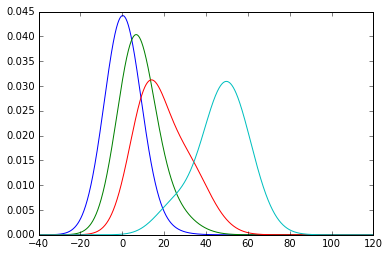

In [80]:
lambda0=np.array([0.9,0.1])
mu0=np.array([0.0,15.0])
tau0=np.array([10.0,15.0])
y=np.array(data.ix[:,1])
sigma=np.array(data.ix[:,2])
J=len(data)
M=len(lambda0)
lambda1=np.zeros(J*M).reshape([J,M])
mu=np.zeros(J*M).reshape([J,M])
tau=np.zeros(J*M).reshape([J,M])
for m in range(M):
    for j in range(J):
        lambda1[j,m]=lambda0[m]*sp.stats.norm.pdf(y[j],mu0[m],np.sqrt(sigma[j]**2+tau0[m]))
    tau[:,m]=(1./(1./tau0[m]**2+1./sigma**2)**0.5)
    mu[:,m]=(mu0[m]/tau0[m]**2+y/sigma**2)*tau[:,m]**2
for j in range(J):
    lambda1[j,:]=lambda1[j,:]/np.sum(lambda1[j,:])

possible=np.array([0.0,25.0,50.0,100.0])
for i in range(len(possible)):
    y[7]=possible[i]
    for m in range(M):
        for j in range(J):
            lambda1[j,m]=lambda0[m]*sp.stats.norm.pdf(y[j],mu0[m],np.sqrt(sigma[j]**2+tau0[m]))
        tau[:,m]=(1./(1./tau0[m]**2+1./sigma**2)**0.5)
        mu[:,m]=(mu0[m]/tau0[m]**2+y/sigma**2)*tau[:,m]**2
    for j in range(J):
        lambda1[j,:]=lambda1[j,:]/np.sum(lambda1[j,:])
    theta=np.arange(-40,120,0.1)
    dens=lambda1[7,0]*sp.stats.norm.pdf(theta,mu[7,0],tau[7,0])+lambda1[7,1]*sp.stats.norm.pdf(theta,mu[7,1],tau[7,1])
    plt.plot(theta,dens)